## **Title:** Prediction of Mortality among ICU admitted patients using Machine Learning Algorithms


# **Importing the Libraries**

In [ ]:
# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Handlers
import numpy as np
import pandas as pd
import math
import sklearn.metrics as metrics

from sklearn import preprocessing
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import mean_squared_error as MSE
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE

from yellowbrick.features import pca_decomposition

from collections import Counter

from scipy import interp

from statistics import mean, stdev

# Visualisation
import matplotlib.patches as patches
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
sns.set_style( 'white' )

# **Loading the Dataset**

In [ ]:
df = pd.read_csv('data01.csv', encoding = 'utf-8')

In [ ]:
df.shape

(1177, 51)

In [ ]:
df.head()

,group,ID,outcome,age,gender,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,0.0,72,1,37.588179,0,0,0,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,0.0,75,2,NaN,0,0,0,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,0.0,83,2,26.572634,0,0,0,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,0.0,43,2,83.264629,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,0.0,75,2,31.824842,1,0,0,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


In [ ]:
df.tail()

,group,ID,outcome,age,gender,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
1172,2,171130,0.0,62,1,25.516870,1,1,0,1,...,136.714286,10.271429,94.428571,20.142857,2.714286,NaN,27.714286,NaN,NaN,40
1173,2,101659,0.0,78,1,25.822710,0,1,0,1,...,135.680000,10.523529,101.720000,18.160000,2.012500,NaN,20.480000,NaN,NaN,30
1174,2,162069,0.0,85,2,23.891779,1,1,0,1,...,136.000000,8.466667,97.285714,14.000000,2.028571,NaN,28.857143,NaN,NaN,55
1175,2,120967,0.0,79,2,35.288554,0,0,1,1,...,140.000000,8.183333,104.000000,15.750000,2.090000,NaN,24.375000,NaN,NaN,25
1176,2,107636,0.0,47,1,23.121384,1,0,0,1,...,135.285714,9.085714,93.857143,20.285714,2.566667,NaN,26.571429,NaN,NaN,55


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   group                     1177 non-null   int64  
 1   ID                        1177 non-null   int64  
 2   outcome                   1176 non-null   float64
 3   age                       1177 non-null   int64  
 4   gender                    1177 non-null   int64  
 5   BMI                       962 non-null    float64
 6   hypertensive              1177 non-null   int64  
 7   atrialfibrillation        1177 non-null   int64  
 8   CHD with no MI            1177 non-null   int64  
 9   diabetes                  1177 non-null   int64  
 10  deficiencyanemias         1177 non-null   int64  
 11  depression                1177 non-null   int64  
 12  Hyperlipemia              1177 non-null   int64  
 13  Renal failure             1177 non-null   int64  
 14  COPD    

In [ ]:
df.columns

Index(['group', 'ID', 'outcome', 'age', 'gender', 'BMI', 'hypertensive',
       'atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'heart rate',
       'Systolic blood pressure', 'Diastolic blood pressure',
       'Respiratory rate', 'temperature', 'SP O2', 'Urine output',
       'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW', 'Leucocyte',
       'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte', 'PT', 'INR',
       'NT-proBNP', 'Creatine kinase', 'Creatinine', 'Urea nitrogen',
       'glucose', 'Blood potassium', 'Blood sodium', 'Blood calcium',
       'Chloride', 'Anion gap', 'Magnesium ion', 'PH', 'Bicarbonate',
       'Lactic acid', 'PCO2', 'EF'],
      dtype='object')

### NaN Values for every variable

In [ ]:
pd.isnull(df).sum()

group                         0
ID                            0
outcome                       1
age                           0
gender                        0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

In [ ]:
df.isnull().mean()*100

group                        0.000000
ID                           0.000000
outcome                      0.084962
age                          0.000000
gender                       0.000000
BMI                         18.266780
hypertensive                 0.000000
atrialfibrillation           0.000000
CHD with no MI               0.000000
diabetes                     0.000000
deficiencyanemias            0.000000
depression                   0.000000
Hyperlipemia                 0.000000
Renal failure                0.000000
COPD                         0.000000
heart rate                   1.104503
Systolic blood pressure      1.359388
Diastolic blood pressure     1.359388
Respiratory rate             1.104503
temperature                  1.614274
SP O2                        1.104503
Urine output                 3.058624
hematocrit                   0.000000
RBC                          0.000000
MCH                          0.000000
MCHC                         0.000000
MCV         

# **Dropping the missing Values from Target Variable "Outcome"**

In [ ]:
df = df.dropna(subset=['outcome'])
df = df.reset_index(drop=True)

In [ ]:
df.shape

(1176, 51)

In [ ]:
pd.isnull(df).sum()

group                         0
ID                            0
outcome                       0
age                           0
gender                        0
BMI                         214
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   12
Systolic blood pressure      15
Diastolic blood pressure     15
Respiratory rate             12
temperature                  18
SP O2                        12
Urine output                 35
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
group,1176.0,1.298469,0.457781,1.000000,1.000000,1.000000,2.000000,2.000000
ID,1176.0,150768.290816,29045.062674,100213.000000,125573.000000,151899.000000,176121.500000,199952.000000
outcome,1176.0,0.135204,0.342087,0.000000,0.000000,0.000000,0.000000,1.000000
age,1176.0,74.047619,13.437241,19.000000,65.000000,77.000000,85.000000,99.000000
gender,1176.0,1.525510,0.499561,1.000000,1.000000,2.000000,2.000000,2.000000
BMI,962.0,30.188278,9.325997,13.346801,24.326461,28.312474,33.633509,104.970366
hypertensive,1176.0,0.717687,0.450316,0.000000,0.000000,1.000000,1.000000,1.000000
atrialfibrillation,1176.0,0.451531,0.497857,0.000000,0.000000,0.000000,1.000000,1.000000
CHD with no MI,1176.0,0.085884,0.280312,0.000000,0.000000,0.000000,0.000000,1.000000
diabetes,1176.0,0.420918,0.493917,0.000000,0.000000,0.000000,1.000000,1.000000


# **Finding the Imbalance Ratio**

In [ ]:
count = df['outcome'].value_counts()
print(count)
imbalance_ratio = count[0] / count[1]
print('r =', imbalance_ratio)

0.0    1017
1.0     159
Name: outcome, dtype: int64
r = 6.39622641509434


# **Plotting the classification outcomes**

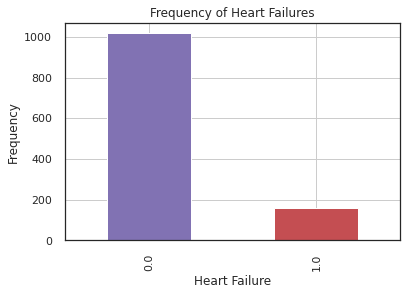

In [ ]:
df['outcome'].value_counts().plot(kind='bar', color = ['m','r'], grid = 'True', title='Frequency of Heart Failures', xlabel='Heart Failure', ylabel='Frequency')

([<matplotlib.patches.Wedge at 0x7f61787bd6a0>,
 [Text(-0.45330845823202465, -1.0022531824321161, '0'),
  Text(0.45330845823202476, 1.0022531824321161, '1')],
 [Text(-0.24725915903564977, -0.5466835540538815, '86.48%'),
  Text(0.24725915903564985, 0.5466835540538815, '13.52%')])

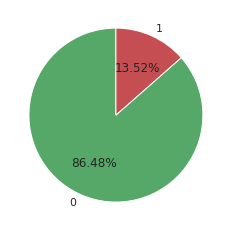

In [ ]:
plt.pie(count, labels = ["0", "1"], autopct='%1.2f%%', colors = ['g','r'], startangle = 90)

# **Removing the outcome feature**

In [ ]:
target = df['outcome']

In [ ]:
target.shape

(1176,)

In [ ]:
df = df.drop(['outcome'], axis=1)

In [ ]:
df.shape

(1176, 50)

In [ ]:
df.head()

,group,ID,age,gender,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,125047,72,1,37.588179,0,0,0,1,1,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,139812,75,2,NaN,0,0,0,0,1,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,109787,83,2,26.572634,0,0,0,0,1,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,130587,43,2,83.264629,0,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,138290,75,2,31.824842,1,0,0,0,1,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


# **Removing the ID feature**

In [ ]:
features = df.drop(["ID"], axis=1)

In [ ]:
features.shape

(1176, 49)

In [ ]:
features.head()

,group,age,gender,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,1,72,1,37.588179,0,0,0,1,1,0,...,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55
1,1,75,2,NaN,0,0,0,0,1,0,...,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55
2,1,83,2,26.572634,0,0,0,0,1,0,...,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35
3,1,43,2,83.264629,0,0,0,0,0,0,...,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55
4,1,75,2,31.824842,1,0,0,0,1,0,...,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55


# **Data is standardized and NaN Value Handling with KNN Imputer**

In [ ]:
df_knn = pd.DataFrame(StandardScaler().fit_transform(features),columns=features.columns)

imputer = KNNImputer(n_neighbors=5, weights='uniform')
dknn = pd.DataFrame(imputer.fit_transform(df_knn), columns=df_knn.columns)

In [ ]:
dknn.shape

(1176, 49)

In [ ]:
dknn.head()

,group,age,gender,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,...,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF
0,-0.652269,-0.152449,-1.052391,0.793883,-1.594418,-0.907334,-0.306518,1.172927,1.395481,-0.367607,...,-0.035472,-1.816730,1.289242,-0.285442,1.979700,-2.207593,-1.111844,-1.376411,-0.435717,0.488840
1,-0.652269,0.070906,0.950217,-0.465407,-1.594418,-0.907334,-0.306518,-0.852568,1.395481,-0.367607,...,-0.001959,-0.593743,-0.721566,-0.934765,-0.925586,-2.281907,1.264118,-1.376411,2.555450,0.488840
2,-0.652269,0.666520,0.950217,-0.387897,-1.594418,-0.907334,-0.306518,-0.852568,1.395481,-0.367607,...,0.438489,-0.411455,0.668586,-1.479359,0.146549,-1.642809,0.708140,-1.376411,2.043803,-1.065508
3,-0.652269,-2.311548,0.950217,5.694186,-1.594418,-0.907334,-0.306518,-0.852568,-0.716599,-0.367607,...,-0.095794,1.706451,-1.916740,-0.590654,-0.705479,-0.126810,2.256278,-1.274713,2.319305,0.488840
4,-0.652269,0.070906,0.950217,0.175575,0.627188,-0.907334,-0.306518,-0.852568,1.395481,-0.367607,...,-0.538157,0.405195,0.414072,0.468611,-1.869917,-1.910338,-0.950579,-1.274713,0.351432,0.488840


In [ ]:
new = pd.concat([dknn, target], axis = 1)
print(new.shape)

(1176, 50)


In [ ]:
pd.isnull(new).sum()

group                       0
age                         0
gender                      0
BMI                         0
hypertensive                0
atrialfibrillation          0
CHD with no MI              0
diabetes                    0
deficiencyanemias           0
depression                  0
Hyperlipemia                0
Renal failure               0
COPD                        0
heart rate                  0
Systolic blood pressure     0
Diastolic blood pressure    0
Respiratory rate            0
temperature                 0
SP O2                       0
Urine output                0
hematocrit                  0
RBC                         0
MCH                         0
MCHC                        0
MCV                         0
RDW                         0
Leucocyte                   0
Platelets                   0
Neutrophils                 0
Basophils                   0
Lymphocyte                  0
PT                          0
INR                         0
NT-proBNP 

# **Using Correlation Heatmap**

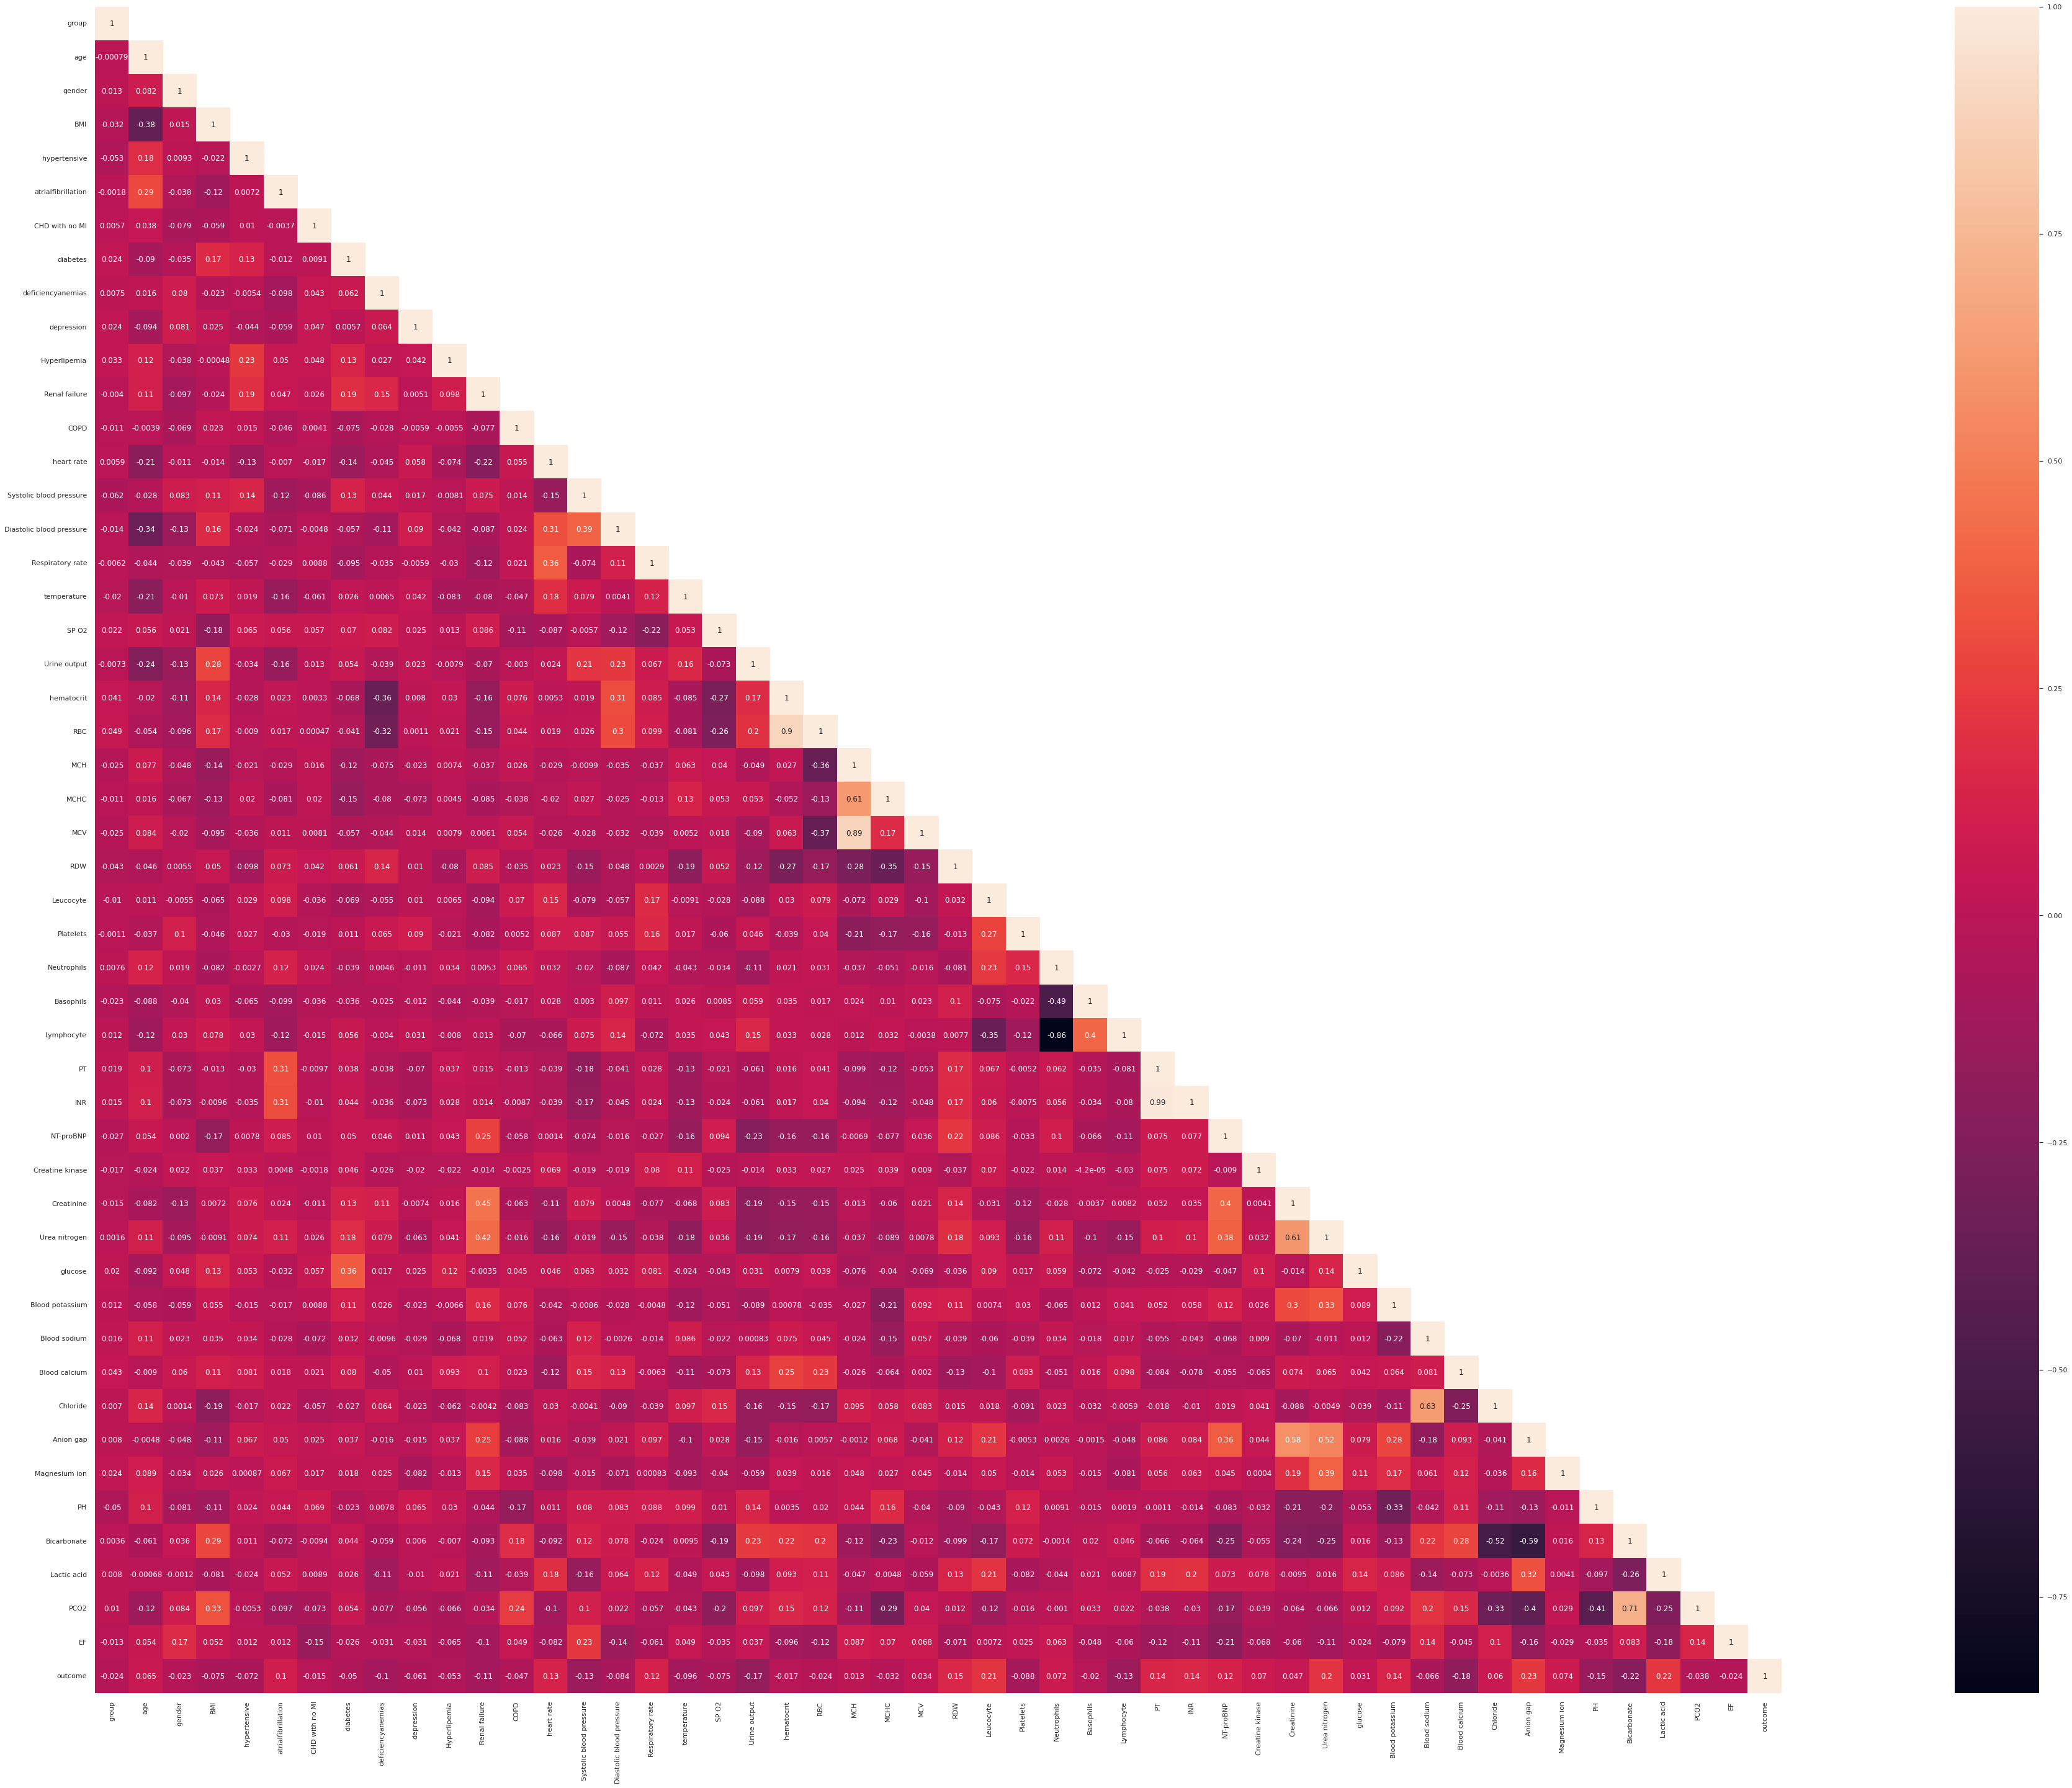

In [ ]:
correlation_map = new.corr()
obj = np.array(correlation_map)
obj[np.tril_indices_from(obj)] = False
fig,ax= plt.subplots()
fig.set_size_inches(100,50)
sns.heatmap(correlation_map, mask=obj, vmax=1, square=True, annot=True)

In [ ]:
X = dknn
y = target
print(X.shape, y.shape)

(1176, 49) (1176,)


# **Test & Train Splitting**

In [ ]:
X_train , X_test , y_train , y_test  = train_test_split(X, y, test_size = 0.25, stratify=y, random_state=72)

# **PCA Decomposition normal split**

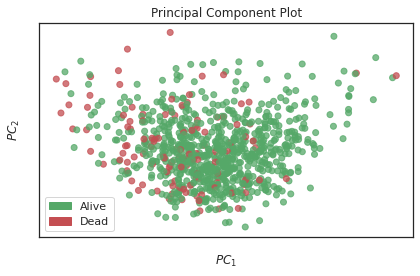

In [ ]:
classes = ['Alive','Dead']
pca_decomposition(X_train, y_train.astype(int), colors=['g', 'r'], classes=classes, projection=2, scale=True);

# **Oversampling using SMOTE**

In [ ]:
# summarize class distribution
print('Original dataset shape %s' % Counter(y_train))

# fit and apply the transform
sm = BorderlineSMOTE(random_state=72)
X_train_SMOTE, y_train_SMOTE = sm.fit_resample(X_train, y_train)

print('Resampled dataset shape %s' % Counter(y_train_SMOTE))

Original dataset shape Counter({0.0: 763, 1.0: 119})
Resampled dataset shape Counter({0.0: 763, 1.0: 763})


# **PCA Decomposition SMOTE split**

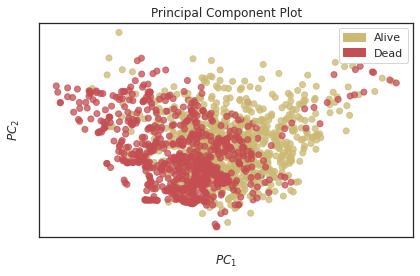

In [ ]:
classes = ['Alive','Dead']
pca_decomposition(X_train_SMOTE, y_train_SMOTE.astype(int), colors=['y', 'r'], classes=classes, projection=2, scale=True);

# **Logistic Regression**

In [ ]:
model = LogisticRegression(random_state=72)
model.fit(X_train_SMOTE,y_train_SMOTE)

X_train_prediction=model.predict(X_train_SMOTE)
training_data_accuracy = accuracy_score(X_train_prediction, y_train_SMOTE)

print('Accuracy of Training Data:',training_data_accuracy*100)

#accuracy of test data
X_test_prediction=model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

print('Accuracy of Test Data:',test_data_accuracy*100)

Accuracy of Training Data: 83.22411533420708
Accuracy of Test Data: 79.59183673469387


### **Confusion matrix for Logistic Regression**

In [ ]:
confusion_matrix(y_test,X_test_prediction)

array([[206,  48],
       [ 12,  28]])

### **Confusion Matrix Visualization**

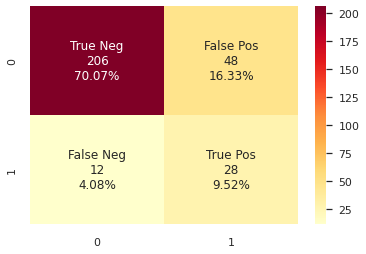

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, X_test_prediction)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='YlOrRd')

### **Classification Report**

In [ ]:
print(classification_report(y_test,X_test_prediction))

              precision    recall  f1-score   support

         0.0       0.94      0.81      0.87       254
         1.0       0.37      0.70      0.48        40

    accuracy                           0.80       294
   macro avg       0.66      0.76      0.68       294
weighted avg       0.87      0.80      0.82       294



### **ROC Curve and AUC**

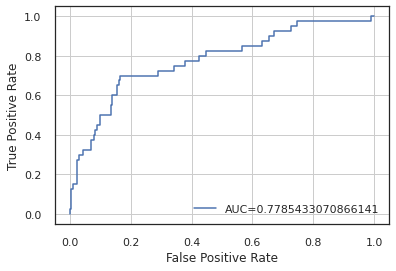

In [ ]:
y_pred_proba = model.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.grid()
plt.show()

# **Logistic Regression using Stratified K folds**

[[98  4]
 [11  5]]
              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93       102
         1.0       0.56      0.31      0.40        16

    accuracy                           0.87       118
   macro avg       0.73      0.64      0.66       118
weighted avg       0.85      0.87      0.86       118

[[99  3]
 [11  5]]
              precision    recall  f1-score   support

         0.0       0.90      0.97      0.93       102
         1.0       0.62      0.31      0.42        16

    accuracy                           0.88       118
   macro avg       0.76      0.64      0.68       118
weighted avg       0.86      0.88      0.86       118

[[98  4]
 [11  5]]
              precision    recall  f1-score   support

         0.0       0.90      0.96      0.93       102
         1.0       0.56      0.31      0.40        16

    accuracy                           0.87       118
   macro avg       0.73      0.64      0.66       118
weighted avg     

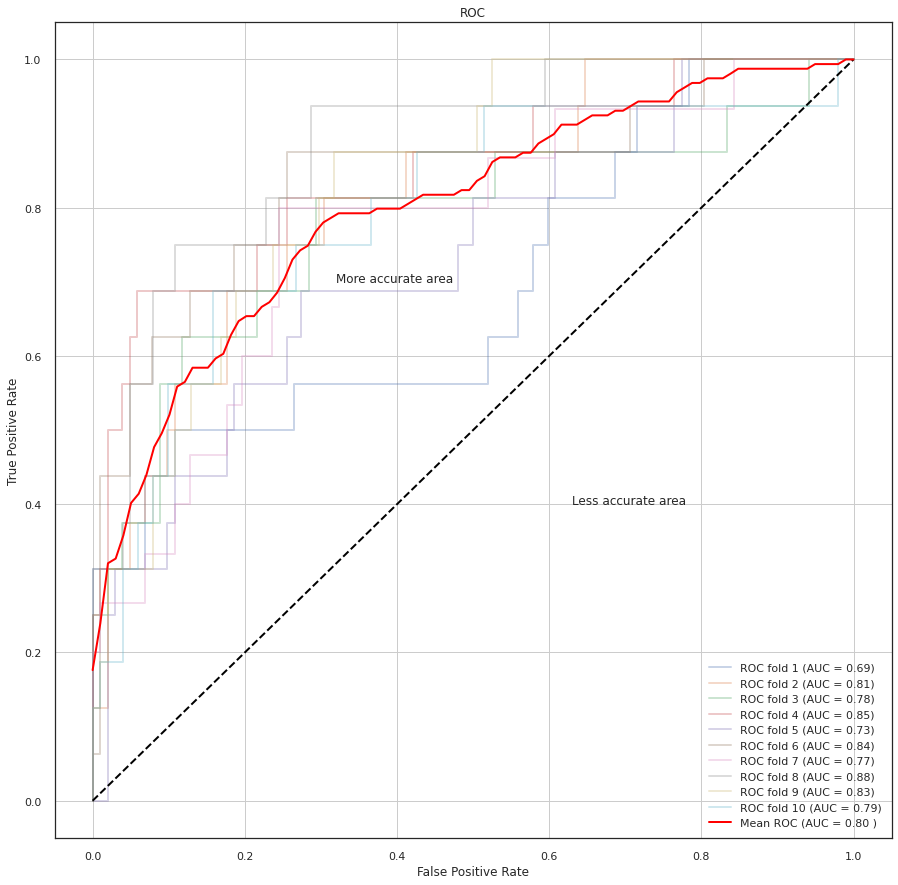

In [ ]:
plt.figure(figsize=(15, 15))

# Create  classifier object.
lr = LogisticRegression()

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=72)
lst_accu_stratified = []

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i = 1
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    lr.fit(x_train_fold, y_train_fold)
    print(confusion_matrix(y_test_fold, lr.predict(x_test_fold)))
    print(classification_report(y_test_fold, lr.predict(x_test_fold)))
    lst_accu_stratified.append(lr.score(x_test_fold, y_test_fold))
    prediction = lr.fit(x_train_fold, y_train_fold).predict_proba(x_test_fold)
    fpr, tpr, thresholds = roc_curve(y_test_fold, prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1


y_pred = cross_val_predict(lr, X, y, cv=10)
print('Overall Report:\n', classification_report(y, y_pred))

# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='red',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.grid()
plt.show()


# **KNN**

### **Accuracy plotting**

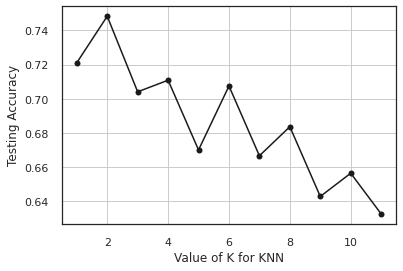

In [ ]:
neighbors_settings = list(range(1, 12))
scores = []
for k in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_SMOTE, y_train_SMOTE)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

plt.plot(neighbors_settings, scores, 'o-k')
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.grid()


In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_SMOTE, y_train_SMOTE)

# Calculate the accuracy of the model
print('Accuracy of the model =', knn.score(X_test, y_test))

Accuracy of the model = 0.7482993197278912


In [ ]:
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_SMOTE, y_train_SMOTE)
y_pred = knn.predict(X_test)

### **Confusion Matrix**

In [ ]:
confusion_matrix(y_test, y_pred)

array([[206,  48],
       [ 26,  14]])

### **Confusion Matrix Visualization**

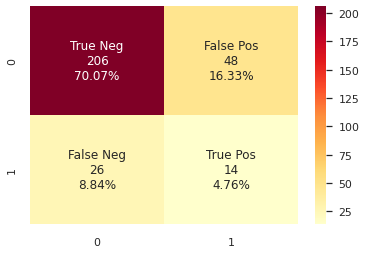

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='YlOrRd')

### **Classification Report**

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.89      0.81      0.85       254
         1.0       0.23      0.35      0.27        40

    accuracy                           0.75       294
   macro avg       0.56      0.58      0.56       294
weighted avg       0.80      0.75      0.77       294



### **ROC Curve and AUC**

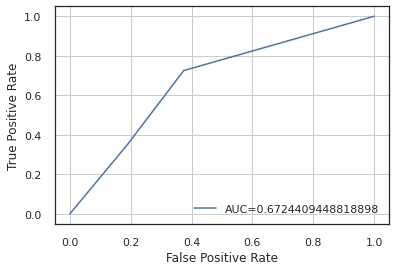

In [ ]:
y_pred_proba = knn.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)


plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.grid()
plt.show()

# **KNN with Stratified K folds**



### **Accuracy plotting**

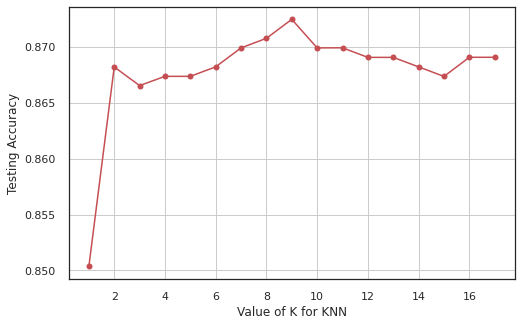

In [ ]:
neighbors_settings = list(range(1, 18))
scores_2 = []
for k in neighbors_settings:
    knn_2 = KNeighborsClassifier(n_neighbors=k)
    skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=72)
    lst_accu_stratified = []
    for train_index, test_index in skf.split(X, y):
        x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
        y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
        knn_2.fit(x_train_fold, y_train_fold)
        lst_accu_stratified.append(knn_2.score(x_test_fold, y_test_fold))
    scores_2.append(mean(lst_accu_stratified))

plt.figure(figsize=(8, 5))
plt.plot(neighbors_settings, scores_2, 'o-r')

plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.grid()
plt.show()

[[102   0]
 [ 14   2]]
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94       102
         1.0       1.00      0.12      0.22        16

    accuracy                           0.88       118
   macro avg       0.94      0.56      0.58       118
weighted avg       0.90      0.88      0.84       118

[[102   0]
 [ 16   0]]
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93       102
         1.0       0.00      0.00      0.00        16

    accuracy                           0.86       118
   macro avg       0.43      0.50      0.46       118
weighted avg       0.75      0.86      0.80       118

[[102   0]
 [ 14   2]]
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94       102
         1.0       1.00      0.12      0.22        16

    accuracy                           0.88       118
   macro avg       0.94      0.56      0.58       118
weigh

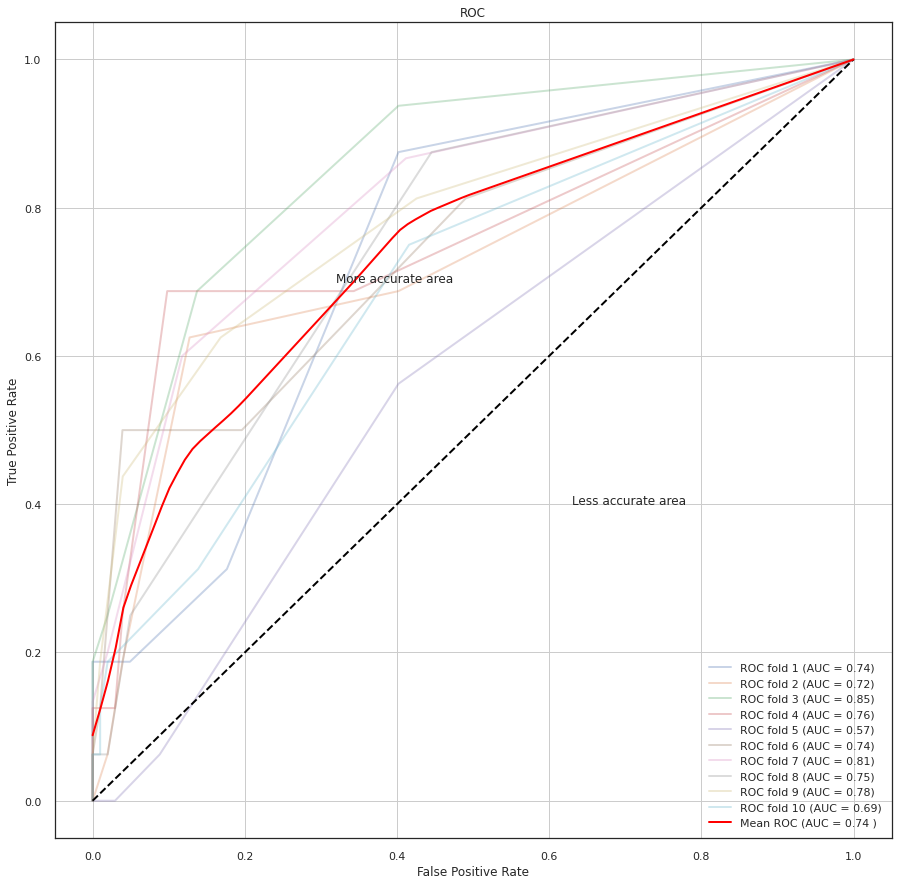

In [ ]:
knn_2 = KNeighborsClassifier(n_neighbors=9)

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=72)
lst_accu_stratified = []

plt.figure(figsize=(15, 15))

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i = 1
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    knn_2.fit(x_train_fold, y_train_fold)
    print(confusion_matrix(y_test_fold, knn_2.predict(x_test_fold)))
    print(classification_report(y_test_fold, knn_2.predict(x_test_fold)))
    lst_accu_stratified.append(knn_2.score(x_test_fold, y_test_fold))
    prediction = knn_2.fit(x_train_fold,y_train_fold).predict_proba(x_test_fold)
    fpr, tpr, thresholds = roc_curve(y_test_fold, prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

y_pred = cross_val_predict(knn_2, X, y, cv=10)
print('Overall Report:\n', classification_report(y, y_pred))

# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))

plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='red',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.grid()
plt.show()

# **Random Forest**

In [ ]:
regressor = RandomForestClassifier(n_estimators = 100, bootstrap = True, random_state = 72)
regressor.fit(X_train_SMOTE, y_train_SMOTE)
y_pred = regressor.predict(X_test)

print('Accuracy of the model =', regressor.score(X_test, y_test))

Accuracy of the model = 0.8503401360544217


### **Confusion Matrix**

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[242  12]
 [ 32   8]]


### **Confusion Matrix Visualization**

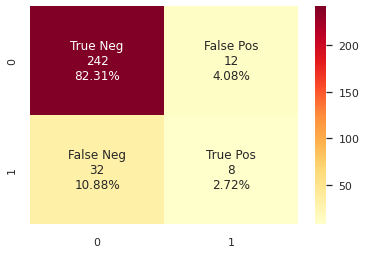

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='YlOrRd')

### **Classification Report**

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.95      0.92       254
         1.0       0.40      0.20      0.27        40

    accuracy                           0.85       294
   macro avg       0.64      0.58      0.59       294
weighted avg       0.82      0.85      0.83       294



### **ROC Curve and AUC**

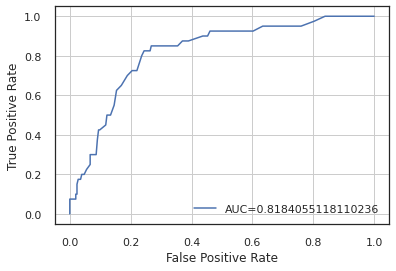

In [ ]:
#define metrics
y_pred_proba = regressor.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
#create ROC curve

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.grid()
plt.show()

# **Random Forest with Stratified K folds**

[[102   0]
 [ 13   3]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       102
         1.0       1.00      0.19      0.32        16

    accuracy                           0.89       118
   macro avg       0.94      0.59      0.63       118
weighted avg       0.90      0.89      0.86       118

[[101   1]
 [ 13   3]]
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       102
         1.0       0.75      0.19      0.30        16

    accuracy                           0.88       118
   macro avg       0.82      0.59      0.62       118
weighted avg       0.87      0.88      0.85       118

[[102   0]
 [ 12   4]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       102
         1.0       1.00      0.25      0.40        16

    accuracy                           0.90       118
   macro avg       0.95      0.62      0.67       118
weigh

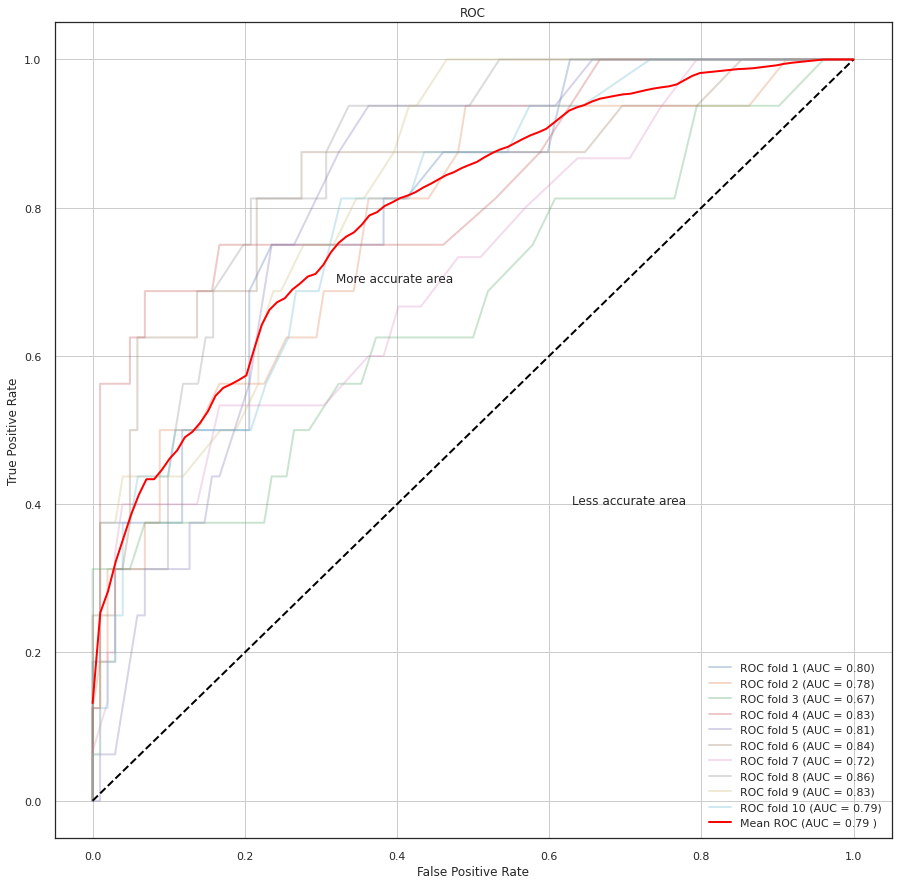

In [ ]:
regressor_2 = RandomForestClassifier(n_estimators = 100, bootstrap = True, random_state = 72)

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=72)
lst_accu_stratified = []

plt.figure(figsize=(15, 15))


tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i = 1
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    regressor_2.fit(x_train_fold, y_train_fold)
    print(confusion_matrix(y_test_fold, regressor_2.predict(x_test_fold)))
    print(classification_report(y_test_fold, regressor_2.predict(x_test_fold)))
    lst_accu_stratified.append(regressor_2.score(x_test_fold, y_test_fold))
    prediction = regressor_2.fit(x_train_fold,y_train_fold).predict_proba(x_test_fold)
    fpr, tpr, t = roc_curve(y_test_fold, prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

y_pred = cross_val_predict(regressor_2, X, y, cv=10)
print('Overall Report:\n', classification_report(y, y_pred))

# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))


plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='red',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.grid()
plt.show()

# **SVM**

In [ ]:
svc_model = SVC(C=1, kernel='sigmoid', gamma=.01, probability=True)
svc_model.fit(X_train_SMOTE, y_train_SMOTE)

y_pred = svc_model.predict(X_test)
print('Accuracy of the model =', svc_model.score(X_test, y_test))

Accuracy of the model = 0.7925170068027211


### **Confusion Matrix**

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[204  50]
 [ 11  29]]


### **Confusion Matrix Visualization**

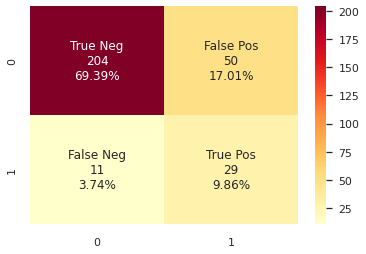

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='YlOrRd')

### **Classification Report**

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.80      0.87       254
         1.0       0.37      0.72      0.49        40

    accuracy                           0.79       294
   macro avg       0.66      0.76      0.68       294
weighted avg       0.87      0.79      0.82       294



### **ROC Curve and AUC**

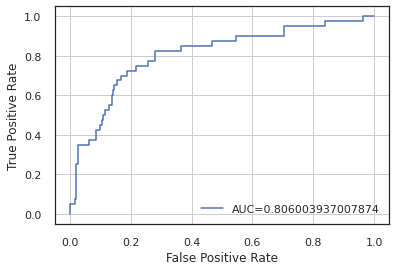

In [ ]:
#define metrics
y_pred_proba = svc_model.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
#create ROC curve

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.grid()
plt.show()

# **SVM with Stratified K folds**

[[102   0]
 [ 13   3]]
              precision    recall  f1-score   support

         0.0       0.89      1.00      0.94       102
         1.0       1.00      0.19      0.32        16

    accuracy                           0.89       118
   macro avg       0.94      0.59      0.63       118
weighted avg       0.90      0.89      0.86       118

[[101   1]
 [ 13   3]]
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       102
         1.0       0.75      0.19      0.30        16

    accuracy                           0.88       118
   macro avg       0.82      0.59      0.62       118
weighted avg       0.87      0.88      0.85       118

[[102   0]
 [ 14   2]]
              precision    recall  f1-score   support

         0.0       0.88      1.00      0.94       102
         1.0       1.00      0.12      0.22        16

    accuracy                           0.88       118
   macro avg       0.94      0.56      0.58       118
weigh

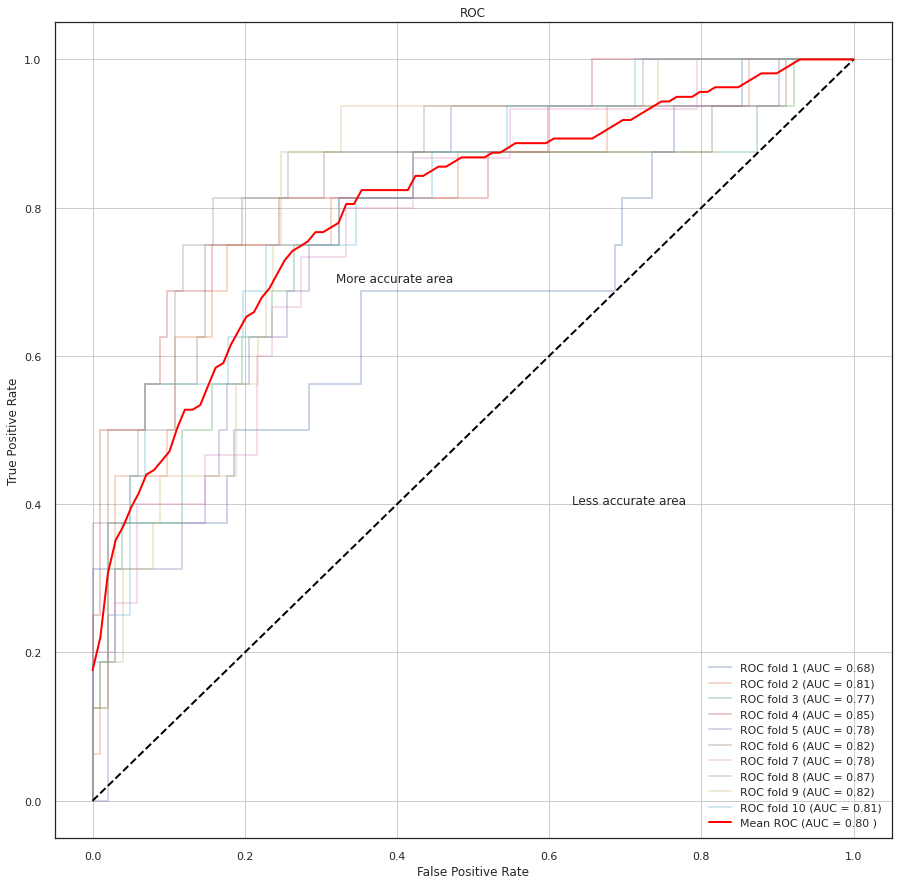

In [ ]:
svc_model_2 = SVC(C=1, kernel='sigmoid', gamma=.01, probability=True)

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=72)
lst_accu_stratified = []

plt.figure(figsize=(15, 15))

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i = 1
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    svc_model_2.fit(x_train_fold, y_train_fold)
    print(confusion_matrix(y_test_fold, svc_model_2.predict(x_test_fold)))
    print(classification_report(y_test_fold, svc_model_2.predict(x_test_fold)))
    lst_accu_stratified.append(svc_model_2.score(x_test_fold, y_test_fold))
    prediction = svc_model_2.fit(x_train_fold,y_train_fold).predict_proba(x_test_fold)
    fpr, tpr, t = roc_curve(y_test_fold, prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

y_pred = cross_val_predict(svc_model_2, X, y, cv=10)
print('Overall Report:\n', classification_report(y, y_pred))

# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))


plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='red',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.grid()
plt.show()

# **Adaboost**

In [ ]:
abc = AdaBoostClassifier(n_estimators=200, learning_rate=1)
abc.fit(X_train_SMOTE, y_train_SMOTE)

y_pred = abc.predict(X_test)

print('Accuracy of the model =', abc.score(X_test, y_test))

Accuracy of the model = 0.8503401360544217


### **Confusion Matrix**

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[231  23]
 [ 21  19]]


### **Confusion Matrix Visualization**

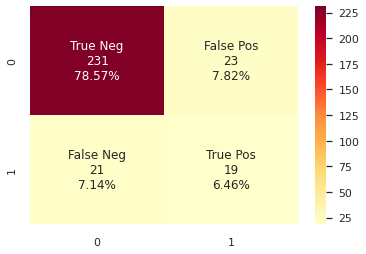

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='YlOrRd')

### **Classification Report**

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.91      0.91       254
         1.0       0.45      0.47      0.46        40

    accuracy                           0.85       294
   macro avg       0.68      0.69      0.69       294
weighted avg       0.85      0.85      0.85       294



### **ROC Curve and AUC**

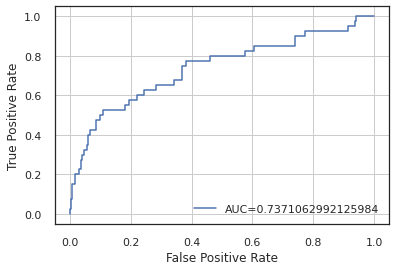

In [ ]:
#define metrics
y_pred_proba = abc.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
#create ROC curve

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.grid()
plt.show()

# **Adaboost with stratified K folds**

[[98  4]
 [10  6]]
              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93       102
         1.0       0.60      0.38      0.46        16

    accuracy                           0.88       118
   macro avg       0.75      0.67      0.70       118
weighted avg       0.87      0.88      0.87       118

[[92 10]
 [11  5]]
              precision    recall  f1-score   support

         0.0       0.89      0.90      0.90       102
         1.0       0.33      0.31      0.32        16

    accuracy                           0.82       118
   macro avg       0.61      0.61      0.61       118
weighted avg       0.82      0.82      0.82       118

[[94  8]
 [12  4]]
              precision    recall  f1-score   support

         0.0       0.89      0.92      0.90       102
         1.0       0.33      0.25      0.29        16

    accuracy                           0.83       118
   macro avg       0.61      0.59      0.59       118
weighted avg     

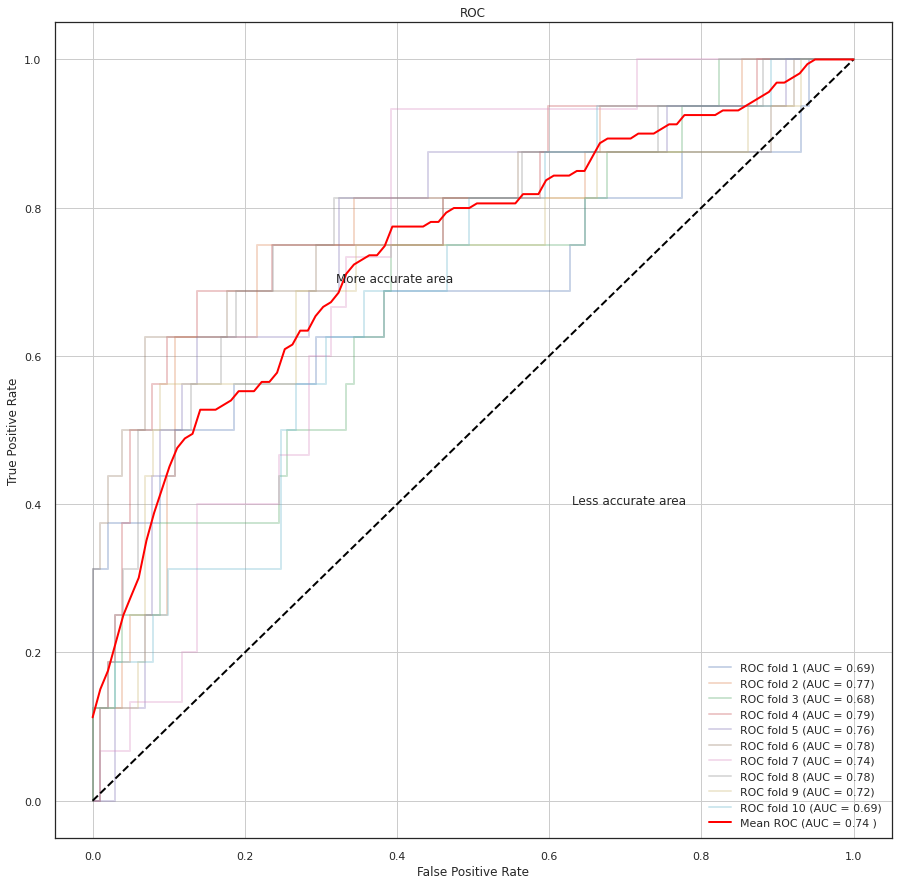

In [ ]:
abc_2 = AdaBoostClassifier(n_estimators=200, learning_rate=1)

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=72)
lst_accu_stratified = []

plt.figure(figsize=(15, 15))

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i = 1
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    abc_2.fit(x_train_fold, y_train_fold)
    print(confusion_matrix(y_test_fold, abc_2.predict(x_test_fold)))
    print(classification_report(y_test_fold, abc_2.predict(x_test_fold)))
    lst_accu_stratified.append(abc_2.score(x_test_fold, y_test_fold))
    prediction = abc_2.fit(x_train_fold,y_train_fold).predict_proba(x_test_fold)
    fpr, tpr, t = roc_curve(y_test_fold, prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

y_pred = cross_val_predict(abc_2, X, y, cv=10)
print('Overall Report:\n', classification_report(y, y_pred))

# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))


plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='red',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.grid()
plt.show()

# **Gradient Boosting**

In [ ]:
gbr = GradientBoostingClassifier(n_estimators = 200, max_depth = 1, random_state = 72)
gbr.fit(X_train_SMOTE, y_train_SMOTE)

y_pred = gbr.predict(X_test)

print('Accuracy of the model =', gbr.score(X_test, y_test))

Accuracy of the model = 0.8299319727891157


### **Confusion Matrix**

In [ ]:
print(confusion_matrix(y_test,y_pred))

[[219  35]
 [ 15  25]]


### **Confusion Matrix Visualization**

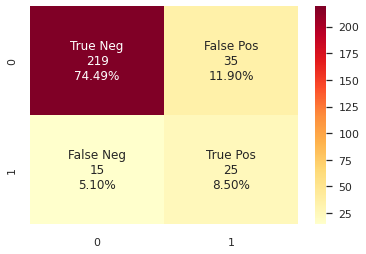

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cnf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cnf_matrix.flatten()/np.sum(cnf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cnf_matrix, annot=labels, fmt='', cmap='YlOrRd')

### **Classification Report**

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.86      0.90       254
         1.0       0.42      0.62      0.50        40

    accuracy                           0.83       294
   macro avg       0.68      0.74      0.70       294
weighted avg       0.87      0.83      0.84       294



### **ROC Curve and AUC**

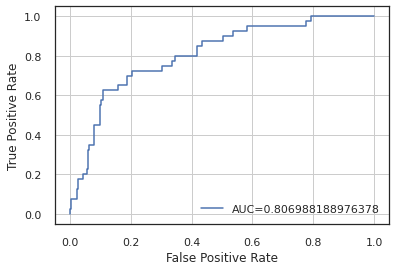

In [ ]:
#define metrics
y_pred_proba = gbr.predict_proba(X_test)[::,1]
fpr, tpr, thresholds = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
#create ROC curve

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.grid()
plt.show()

# **Gradient Boosting with stratified K folds**

[[101   1]
 [ 10   6]]
              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95       102
         1.0       0.86      0.38      0.52        16

    accuracy                           0.91       118
   macro avg       0.88      0.68      0.74       118
weighted avg       0.90      0.91      0.89       118

[[101   1]
 [ 12   4]]
              precision    recall  f1-score   support

         0.0       0.89      0.99      0.94       102
         1.0       0.80      0.25      0.38        16

    accuracy                           0.89       118
   macro avg       0.85      0.62      0.66       118
weighted avg       0.88      0.89      0.86       118

[[101   1]
 [ 11   5]]
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       102
         1.0       0.83      0.31      0.45        16

    accuracy                           0.90       118
   macro avg       0.87      0.65      0.70       118
weigh

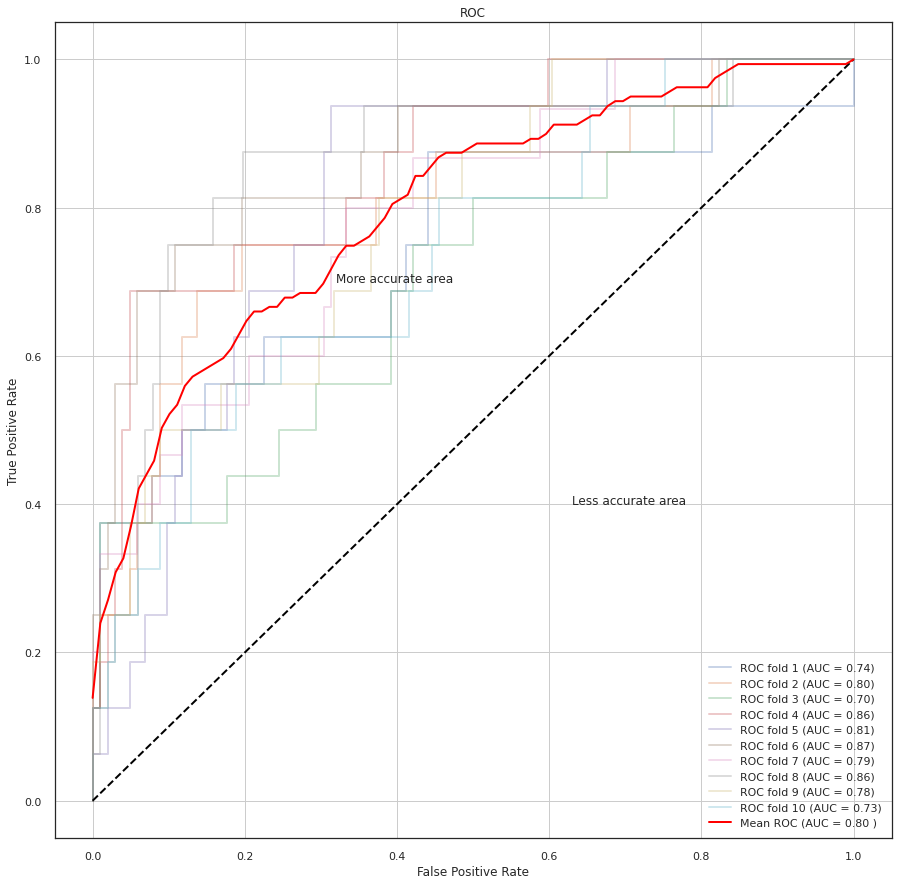

In [ ]:
gbr_2 = GradientBoostingClassifier(n_estimators = 200, max_depth = 1, random_state = 72)

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=72)
lst_accu_stratified = []

plt.figure(figsize=(15, 15))

tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i = 1
for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index]
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]
    gbr_2.fit(x_train_fold, y_train_fold)
    print(confusion_matrix(y_test_fold, gbr_2.predict(x_test_fold)))
    print(classification_report(y_test_fold, gbr_2.predict(x_test_fold)))
    lst_accu_stratified.append(gbr_2.score(x_test_fold, y_test_fold))
    prediction = gbr_2.fit(x_train_fold,y_train_fold).predict_proba(x_test_fold)
    fpr, tpr, t = roc_curve(y_test_fold, prediction[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = metrics.auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1

y_pred = cross_val_predict(gbr_2, X, y, cv=10)
print('Overall Report:\n', classification_report(y, y_pred))

# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
      min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
      mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))


plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = metrics.auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='red',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.grid()
plt.show()

# **Voting Ensemble**

In [ ]:
classifiers = [['LogisticRegression :', LogisticRegression(random_state=72)],
               ['KNeighbours :', KNeighborsClassifier(n_neighbors=2)],
               ['RandomForest :',RandomForestClassifier(n_estimators = 100, bootstrap = True, random_state = 72)],
               ['SVM :', SVC(C=1, kernel='sigmoid', gamma=.01, probability=True)],
               ['AdaBoost :', AdaBoostClassifier(n_estimators=200, learning_rate=1)],
               ['GradientBoosting :', GradientBoostingClassifier(n_estimators = 200, max_depth = 1, random_state = 72)]]

predictions_df = pd.DataFrame()
predictions_df['action'] = y_test

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(X_train_SMOTE, y_train_SMOTE.ravel())
    predictions = classifier.predict(X_test)
    predictions_df[name.strip(" :")] = predictions
    print(name, accuracy_score(y_test, predictions))

LogisticRegression : 0.7959183673469388
KNeighbours : 0.7482993197278912
RandomForest : 0.8503401360544217
SVM : 0.7925170068027211
AdaBoost : 0.8503401360544217
GradientBoosting : 0.8299319727891157


# **Soft Voting**

In [ ]:
clf1 = RandomForestClassifier(n_estimators = 100, bootstrap = True, random_state = 72)
clf2 = AdaBoostClassifier(n_estimators=200, learning_rate=1)
clf3 = GradientBoostingClassifier(n_estimators = 200, max_depth = 1, random_state = 72)
eclf1 = VotingClassifier(estimators=[('RandomForest', clf1), ('AdaBoost', clf2), ('GradientBoost', clf3)], voting='soft')
eclf1.fit(X_train_SMOTE, y_train_SMOTE)
predictions = eclf1.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91       254
         1.0       0.44      0.45      0.44        40

    accuracy                           0.85       294
   macro avg       0.68      0.68      0.68       294
weighted avg       0.85      0.85      0.85       294



# **Hard Voting**

In [ ]:
eclf2 = VotingClassifier(estimators=[('RandomForest', clf1), ('AdaBoost', clf2), ('GradientBoost', clf3)], voting='hard')
eclf2.fit(X_train_SMOTE, y_train_SMOTE)
predictions = eclf2.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92       254
         1.0       0.49      0.45      0.47        40

    accuracy                           0.86       294
   macro avg       0.70      0.69      0.69       294
weighted avg       0.86      0.86      0.86       294



# **Voting Ensemble with Stratified K folds**

In [ ]:
classifiers = [['LogisticRegression :', LogisticRegression(random_state=72)],
               ['KNeighbours :', KNeighborsClassifier(n_neighbors=9)],
               ['RandomForest :',RandomForestClassifier(n_estimators = 100, bootstrap = True, random_state = 72)],
               ['SVM :', SVC(C=1, kernel='sigmoid', gamma=.01, probability=True)],
               ['AdaBoost :', AdaBoostClassifier(n_estimators=200, learning_rate=1)],
               ['GradientBoosting :', GradientBoostingClassifier(n_estimators = 200, max_depth = 1, random_state = 72)]]

predictions_df = pd.DataFrame()
predictions_df['action'] = y_test_fold

for name,classifier in classifiers:
    classifier = classifier
    classifier.fit(x_train_fold, y_train_fold.ravel())
    predictions = classifier.predict(x_test_fold)
    predictions_df[name.strip(" :")] = predictions
    print(name, accuracy_score(y_test_fold, predictions))

LogisticRegression : 0.8547008547008547
KNeighbours : 0.8632478632478633
RandomForest : 0.8632478632478633
SVM : 0.8888888888888888
AdaBoost : 0.8290598290598291
GradientBoosting : 0.8717948717948718


# **Soft Voting Stratified**

In [ ]:
clf1 = RandomForestClassifier(n_estimators = 100, bootstrap = True, random_state = 72)
clf2 = SVC(C=1, kernel='sigmoid', gamma=.01, probability=True)
clf3 = GradientBoostingClassifier(n_estimators = 200, max_depth = 1, random_state = 72)
eclf1 = VotingClassifier(estimators=[('RandomForest', clf1), ('SVM', clf2), ('GradientBoost', clf3)], voting='soft')
eclf1.fit(x_train_fold, y_train_fold)
predictions = eclf1.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.95       254
         1.0       0.94      0.42      0.59        40

    accuracy                           0.92       294
   macro avg       0.93      0.71      0.77       294
weighted avg       0.92      0.92      0.90       294



# **Hard Voting Statified**

In [ ]:
eclf2 = VotingClassifier(estimators=[('RandomForest', clf1), ('SVM', clf2), ('GradientBoost', clf3)], voting='hard')
eclf2.fit(x_train_fold, y_train_fold)
predictions = eclf2.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       254
         1.0       0.93      0.35      0.51        40

    accuracy                           0.91       294
   macro avg       0.92      0.67      0.73       294
weighted avg       0.91      0.91      0.89       294

